# Weather prediction

**Task.** Predict next-day rain by training classification models on the target variable "RainTomorrow". <br>
This dataset contains about 10 years of daily weather observations from many locations across Australia. <br>
RainTomorrow is the target variable to predict. The value is "Yes" if the amount of precipitation is 1 mm or more.

#### Description of the data set:
   - **Date**. The date of observation;
   - **Location**.The common name of the location of the weather station;
   - **MinTemp**. The minimum temperature in degrees celsius;
   - **MaxTemp**. The maximum temperature in degrees celsius;
   - **Rainfall**. The amount of rainfall recorded for the day in mm;
   - **Evaporation**. The so-called Class A pan evaporation (mm) in the 24 hours to 9am;
   - **Sunshine**. The number of hours of bright sunshine in the day;
   - **WindGustDir**. The direction of the strongest wind gust in the 24 hours to midnight;
   - **WindGustSpeed**. The speed (km/h) of the strongest wind gust in the 24 hours to midnight;
   - **WindDir9am**. Direction of the wind at 9am;
   - **WindDir3pm**. Direction of the wind at 3pm;
   - **WindSpeed9am**. Wind speed (km/hr) averaged over 10 minutes prior to 9am;
   - **WindSpeed3pm**. Wind speed (km/hr) averaged over 10 minutes prior to 3pm;
   - **Humidity9am**. Humidity (percent) at 9am;
   - **Humidity3pm**. Humidity (percent) at 3pm;
   - **Pressure9am**. Atmospheric pressure (hpa) reduced to mean sea level at 9am;
   - **Pressure3pm**. Atmospheric pressure (hpa) reduced to mean sea level at 3pm;
   - **Cloud9am**. Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many;
   - **Cloud3pm**. Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the value;
   - **Temp9am**. Temperature (degrees C) at 9am;
   - **Temp3pm**. Temperature (degrees C) at 3pm;
   - **RainToday**. Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0;
   - **RainTomorrow**. The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

План работы:
1. [Study of general information.](#id1)
2. [Data preprocessing.](#id2)
3. [Exploratory data analysis.](#id3)
4. [Model building .](#id4)
5. [General conclusion.](#id5)

In [725]:
import pandas as pd
import numpy as np

from collections import Counter

from pymystem3 import Mystem

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

<a id="id1"></a>
## 1. Study of general information

In [680]:
data = pd.read_csv('weatherAUS.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [681]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [682]:
data.duplicated().sum()

0

In [683]:
null = round(data.isnull().sum() / data.shape[0], 3)
null = null[null != 0] \
    .reset_index() \
    .rename(columns={'index': 'Feature', 0: 'Percentage'})
fig = px.bar(null, x='Percentage', y='Feature', text='Percentage', template='ggplot2',
            title='<b>Percentage of missing values<b>', height=800)
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=12, font_size=16)
fig.show()

In [684]:
unique_number = data.nunique() \
                .reset_index() \
                .rename(columns={'index': 'Feature', 0: 'Count'})
fig = px.bar(unique_number, x='Count', y='Feature', text='Count', template='ggplot2',
            title='<b>Number of unique values<b>', height=800)
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=12, font_size=16)
fig.show()

In [685]:
data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<a id="id2"></a>
## 2. Data preprocessing

In [686]:
data.columns = data.columns.str.lower()

In [687]:
data.date = pd.to_datetime(data.date)

### 2.1. Processing of missing values

For data preprocessing, it is useful to know about the linear relationships of features.

In [688]:
data_for_corr = data.copy()
data_for_corr['raintomorrow'] = data_for_corr['raintomorrow'].map({'Yes': 1, 'No': 0})
data_for_corr['raintoday'] = data_for_corr['raintoday'].map({'Yes': 1, 'No': 0})
corrs = data_for_corr.corr()
ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=np.around(corrs.values, decimals=2),
    showscale=True)

#### 2.1.1. raintomorrow

"raintomorrow" is a target variable, so replacing missing values is not allowed.

In [689]:
data = data[data.raintomorrow.notnull()]

#### 2.1.2. raintoday

In [690]:
data[(data.raintoday.isnull()) & (data.rainfall.isnull())].shape[0]

1406

In [691]:
data[data.raintoday.isnull()].shape[0], data[data.rainfall.isnull()].shape[0]

(1406, 1406)

If the values are missing in the "raintoday" column, then they are necessarily missing in the "rainfall" column. We do not have data to replace, so we will delete rows with missing values.

In [692]:
data = data[(data.raintoday.notnull()) & (data.rainfall.notnull())]

#### 2.1.3. mintemp, maxtemp, temp9am, temp3pm

Let's create a pivot table containing information about the median temperature depending on the month and location. Then fill in the missing values using this table.

In [693]:
temp_date = pd.pivot_table(data, index=[data['date'].dt.month, 'location'], 
               values=['mintemp', 'maxtemp', 'temp9am', 'temp3pm'], aggfunc='median')
temp_date

maxtemp  mintemp  temp3pm  temp9am
date location                                         
1    Adelaide          30.4     17.1    28.90    21.70
     Albany            22.8     17.0    21.10    20.05
     Albury            33.0     17.0    31.20    23.00
     AliceSprings      36.7     21.9    35.40    29.70
     BadgerysCreek     30.1     17.8    28.20    22.30
...                     ...      ...      ...      ...
12   Watsonia          25.2     12.9    23.00    16.60
     Williamtown       26.8     17.2    25.00    22.50
     Witchcliffe       23.9     12.5    21.80    19.50
     Wollongong        23.5     17.6    21.90    20.70
     Woomera           33.1     17.5    30.65    22.60

[588 rows x 4 columns]

In [694]:
def fill_temp3pm(row):
    temp = row['temp3pm']
    if pd.isnull(temp):
        month = row['date'].month
        location = row['location']
        return temp_date.loc[month, location]['temp3pm']
    return temp

def fill_temp9pm(row):
    temp = row['temp9am']
    if pd.isnull(temp):
        month = row['date'].month
        location = row['location']
        return temp_date.loc[month, location]['temp9am']
    return temp

def fill_mintemp(row):
    temp = row['mintemp']
    if pd.isnull(temp):
        month = row['date'].month
        location = row['location']
        return temp_date.loc[month, location]['mintemp']
    return temp

def fill_maxtemp(row):
    temp = row['maxtemp']
    if pd.isnull(temp):
        month = row['date'].month
        location = row['location']
        return temp_date.loc[month, location]['maxtemp']
    return temp

data['temp3pm'] = data.apply(fill_temp3pm, axis=1)
data['temp9am'] = data.apply(fill_temp9pm, axis=1)
data['mintemp'] = data.apply(fill_mintemp, axis=1)
data['maxtemp'] = data.apply(fill_maxtemp, axis=1)

#### 2.1.4.  pressure9am, pressure3pm

In [695]:
data[(data.pressure3pm.isnull()) & (data.pressure9am.isnull() )].shape[0]

13583

If the values are missing in the "pressure3pm" column, then they are almost always missing in the "pressure9am" column. <br>
Let's create a pivot table containing information about the median pressure depending on the month and location. Then fill in the missing values using this table.

In [696]:
pressure_date = pd.pivot_table(data, index=[data['date'].dt.month, 'location'], 
               values=['pressure9am', 'pressure3pm'], aggfunc='median', dropna=False)
pressure_date

pressure3pm  pressure9am
date location                               
1    Adelaide           1012.05      1013.80
     Albany             1013.85      1015.60
     Albury             1009.80      1012.60
     AliceSprings       1004.70      1008.15
     BadgerysCreek      1011.90      1014.30
...                         ...          ...
12   Watsonia           1012.10      1014.40
     Williamtown        1012.90      1014.90
     Witchcliffe        1014.10      1015.40
     Wollongong         1013.20      1014.85
     Woomera            1010.60      1013.10

[588 rows x 2 columns]

In [697]:
def fill_pressure9am(row):
    pressure = row['pressure9am']
    if pd.isnull(pressure):
        month = row['date'].month
        location = row['location']
        new_pressure = pressure_date.loc[month, location]['pressure9am']
        if pd.isnull(new_pressure):
            return pressure_date.loc[month]['pressure9am'].median()
        return new_pressure
    return pressure

def fill_pressure3pm(row):
    pressure = row['pressure3pm']
    if pd.isnull(pressure):
        month = row['date'].month
        location = row['location']
        new_pressure = pressure_date.loc[month, location]['pressure3pm']
        if pd.isnull(new_pressure):
            return pressure_date.loc[month]['pressure3pm'].median()
        return new_pressure
    return pressure

data['pressure9am'] = data.apply(fill_pressure9am, axis=1)
data['pressure3pm'] = data.apply(fill_pressure3pm, axis=1)

#### 2.1.5.  windspeed9am, windspeed3pm, windgustspeed

The missing values will be replaced in the same way as temperature and pressure.

In [698]:
wind_speed_date = pd.pivot_table(data, index=[data['date'].dt.month, 'location'], 
               values=['windspeed9am', 'windspeed3pm', 'windgustspeed'], aggfunc='median', dropna=False)
wind_speed_date

windgustspeed  windspeed3pm  windspeed9am
date location                                                
1    Adelaide                37.0          15.0           9.0
     Albany                   NaN          24.0          15.0
     Albury                  37.0          15.0           9.0
     AliceSprings            44.0          19.0          17.0
     BadgerysCreek           35.0          15.0           6.0
...                           ...           ...           ...
12   Watsonia                37.0          17.0           9.0
     Williamtown             41.0          24.0          14.0
     Witchcliffe             43.0          24.0          19.0
     Wollongong              45.0          21.0          17.0
     Woomera                 46.0          19.5          22.0

[588 rows x 3 columns]

In [699]:
def fill_windspeed9am(row):
    windspeed = row['windspeed9am']
    if pd.isnull(windspeed):
        month = row['date'].month
        location = row['location']
        new_windspeed = wind_speed_date.loc[month, location]['windspeed9am']
        if pd.isnull(new_windspeed):
            return wind_speed_date.loc[month]['windspeed9am'].median()
        return new_windspeed
    return windspeed

def fill_windspeed3pm(row):
    windspeed = row['windspeed3pm']
    if pd.isnull(windspeed):
        month = row['date'].month
        location = row['location']
        new_windspeed = wind_speed_date.loc[month, location]['windspeed3pm']
        if pd.isnull(new_windspeed):
            return wind_speed_date.loc[month]['windspeed3pm'].median()
        return new_windspeed
    return windspeed

def fill_windgustspeed(row):
    windspeed = row['windgustspeed']
    if pd.isnull(windspeed):
        month = row['date'].month
        location = row['location']
        new_windspeed = wind_speed_date.loc[month, location]['windgustspeed']
        if pd.isnull(new_windspeed):
            return wind_speed_date.loc[month]['windgustspeed'].median()
        return new_windspeed
    return windspeed

data['windspeed9am'] = data.apply(fill_windspeed9am, axis=1)
data['windspeed3pm'] = data.apply(fill_windspeed3pm, axis=1)
data['windgustspeed'] = data.apply(fill_windgustspeed, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           140787 non-null  datetime64[ns]
 1   location       140787 non-null  object        
 2   mintemp        140787 non-null  float64       
 3   maxtemp        140787 non-null  float64       
 4   rainfall       140787 non-null  float64       
 5   evaporation    81093 non-null   float64       
 6   sunshine       73982 non-null   float64       
 7   windgustdir    131624 non-null  object        
 8   windgustspeed  140787 non-null  float64       
 9   winddir9am     131127 non-null  object        
 10  winddir3pm     137117 non-null  object        
 11  windspeed9am   140787 non-null  float64       
 12  windspeed3pm   140787 non-null  float64       
 13  humidity9am    139270 non-null  float64       
 14  humidity3pm    137286 non-null  float64       
 15  

#### 2.1.6.  windgustdir, winddir9am, winddir3pm

The missing values will be replaced with the mode.

In [700]:
data['windgustdir'].fillna(data['windgustdir'].mode()[0], inplace=True)
data['winddir9am'].fillna(data['winddir9am'].mode()[0], inplace=True)
data['winddir3pm'].fillna(data['winddir3pm'].mode()[0], inplace=True)

#### 2.1.7.  humidity9am, humidity3pm

The missing values will be replaced with median values, taking into account the month and location.

In [701]:
humidity_date = pd.pivot_table(data, index=[data['date'].dt.month, 'location'], 
               values=['humidity9am', 'humidity3pm'], aggfunc='median', dropna=False)
humidity_date

humidity3pm  humidity9am
date location                               
1    Adelaide              31.0         48.0
     Albany                69.0         70.0
     Albury                27.0         51.0
     AliceSprings          20.0         32.0
     BadgerysCreek         49.0         72.5
...                         ...          ...
12   Watsonia              46.0         67.0
     Williamtown           55.0         68.0
     Witchcliffe           49.0         54.0
     Wollongong            73.0         75.0
     Woomera               16.0         38.0

[588 rows x 2 columns]

In [702]:
def fill_humidity9am(row):
    humidity = row['humidity9am']
    if pd.isnull(humidity):
        month = row['date'].month
        location = row['location']
        new_humidity = humidity_date.loc[month, location]['humidity9am']
        if pd.isnull(new_humidity):
            return humidity_date.loc[month]['humidity9am'].median()
        return new_humidity
    return humidity

def fill_humidity3pm(row):
    humidity = row['humidity3pm']
    if pd.isnull(humidity):
        month = row['date'].month
        location = row['location']
        new_humidity = humidity_date.loc[month, location]['humidity3pm']
        if pd.isnull(new_humidity):
            return humidity_date.loc[month]['humidity3pm'].median()
        return new_humidity
    return humidity

data['humidity9am'] = data.apply(fill_humidity9am, axis=1)
data['humidity3pm'] = data.apply(fill_humidity3pm, axis=1)

#### 2.1.8.  evaporation, sunshine, cloud9am, cloud3pm

In these columns, approximately 40% of the data is missing. This is too much for us to replace them with a median or some other statistic. We will leave the omissions for now without processing.

In [703]:
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           140787 non-null  datetime64[ns]
 1   location       140787 non-null  object        
 2   mintemp        140787 non-null  float64       
 3   maxtemp        140787 non-null  float64       
 4   rainfall       140787 non-null  float64       
 5   evaporation    81093 non-null   float64       
 6   sunshine       73982 non-null   float64       
 7   windgustdir    140787 non-null  object        
 8   windgustspeed  140787 non-null  float64       
 9   winddir9am     140787 non-null  object        
 10  winddir3pm     140787 non-null  object        
 11  windspeed9am   140787 non-null  float64       
 12  windspeed3pm   140787 non-null  float64       
 13  humidity9am    140787 non-null  float64       
 14  humidity3pm    140787 non-null  float64       
 15  

### 2.2. Search for outliers and anomalies

To search for anomalies and outliers, we will need to estimate the distribution of each feature.

In [704]:
categorical = [feature for feature in data.columns if data[feature].dtype=='O']
numerical = [feature for feature in data.columns if data[feature].dtype=='float64']

#### 2.2.1. Numerical features

In [705]:
def plot_numerical(columns=[]):
    fig = plt.figure(figsize=(16, 14))
    for i in range(4):
        fig.add_subplot(2, 2, i+1)
        sns.boxenplot(data=data, x=columns[i])
        plt.xlabel(columns[i], fontdict={'size': 18})
        plt.xticks(fontsize=14)
    plt.show()

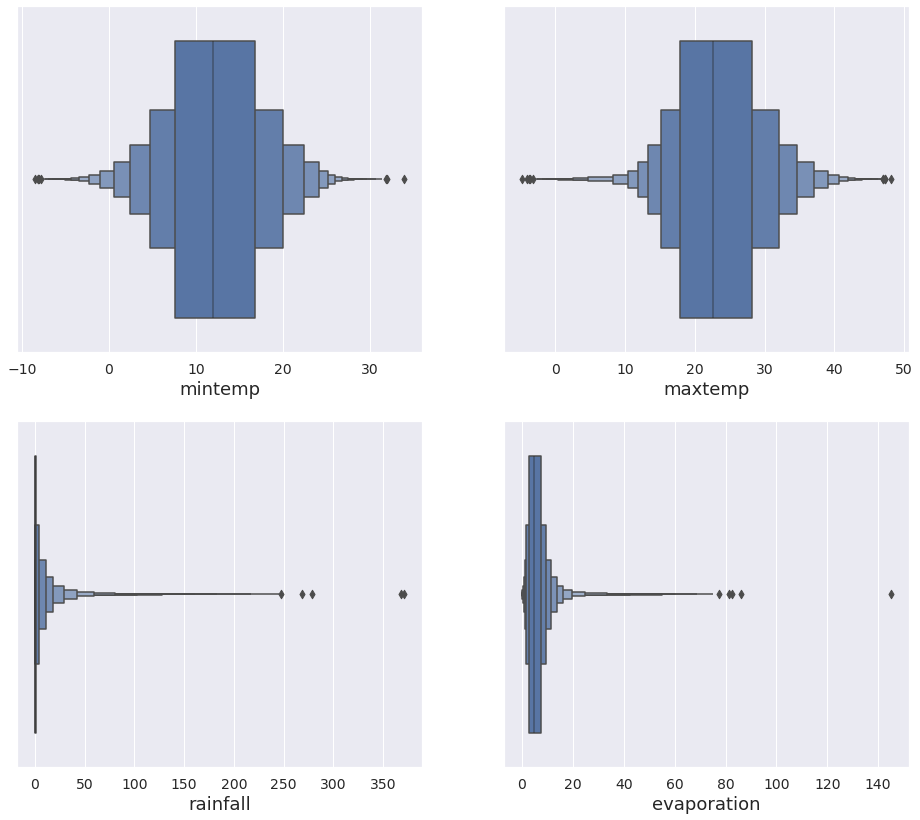

In [706]:
plot_numerical(columns=['mintemp', 'maxtemp', 'rainfall', 'evaporation'])

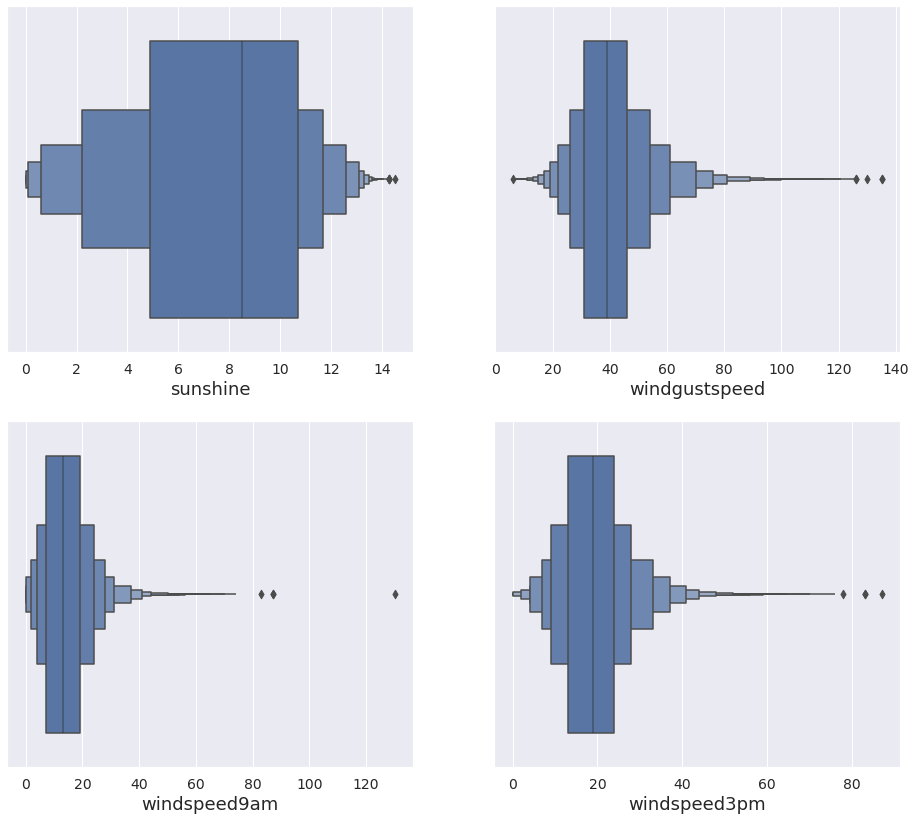

In [707]:
plot_numerical(columns=['sunshine', 'windgustspeed', 'windspeed9am', 'windspeed3pm'])

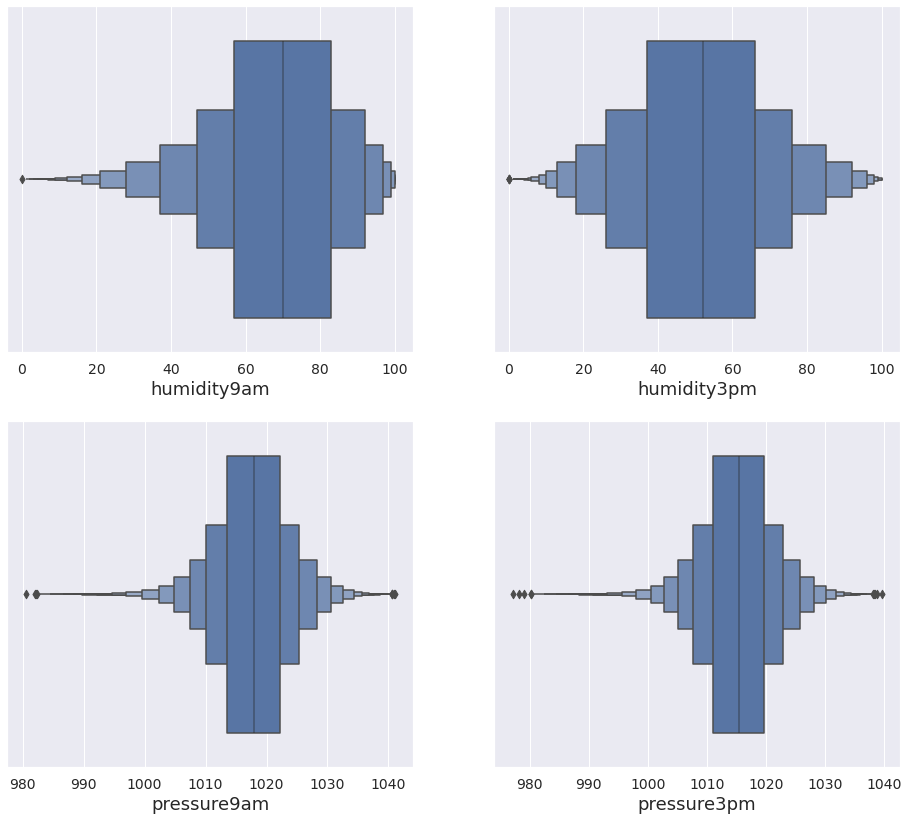

In [708]:
plot_numerical(columns=['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm'])

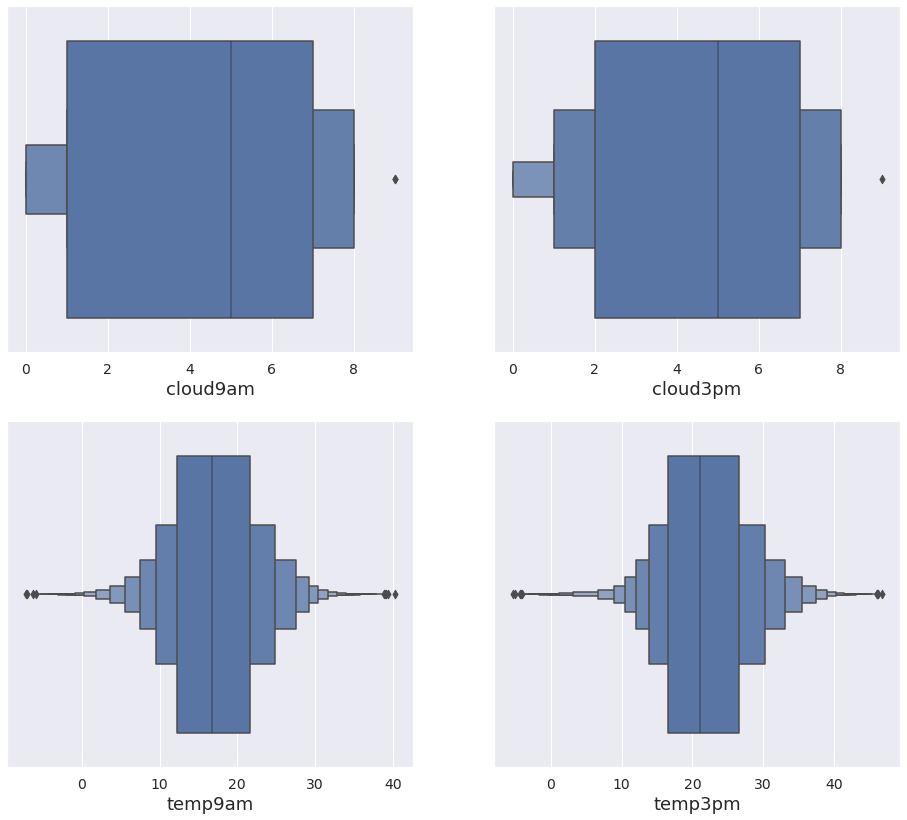

In [709]:
plot_numerical(columns=['cloud9am', 'cloud3pm', 'temp9am', 'temp3pm'])

Cloud cover is measured in "oktas" in the range from 0 to 8. In our data there are objects with a cloud cover of 9 oct. Delete these rows.

In [710]:
index = data[(data.cloud3pm == 9) | (data.cloud9am == 9)].index
data = data.drop(index)

#### 2.2.2. Categorial features

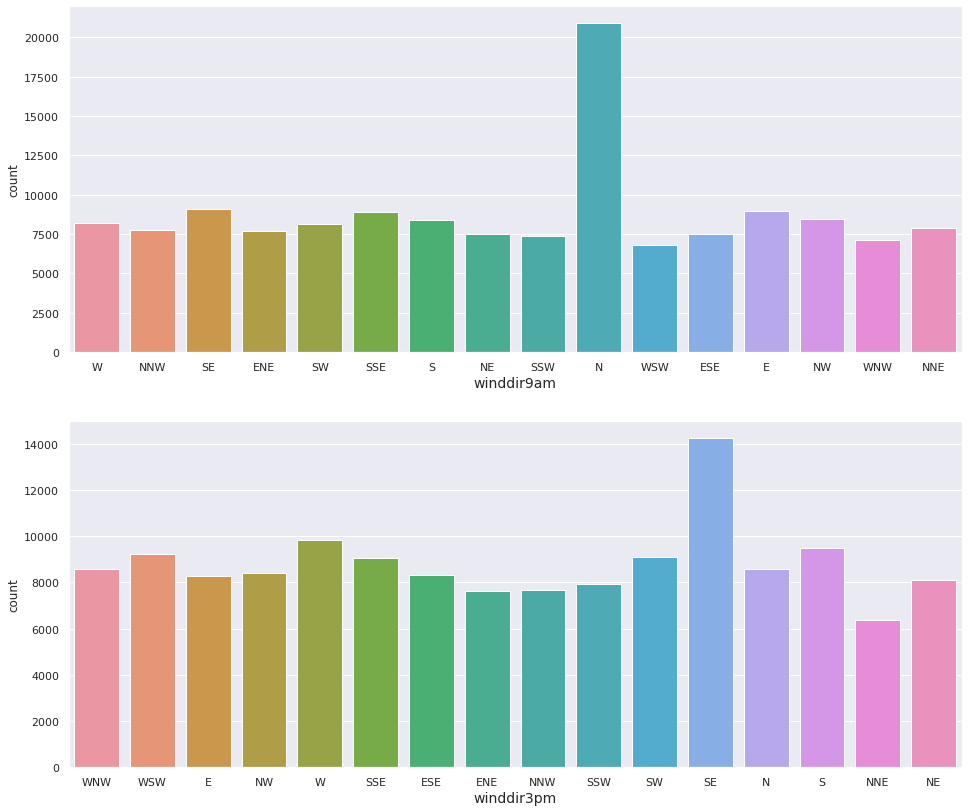

In [712]:
fig, ax = plt.subplots(2, 1, figsize=(16, 14))
sns.countplot(data=data, x='winddir9am', ax=ax[0])
sns.countplot(data=data, x='winddir3pm', ax=ax[1])

ax[0].set_xlabel('winddir9am', fontsize=14)
ax[1].set_xlabel('winddir3pm', fontsize=14)

plt.show()

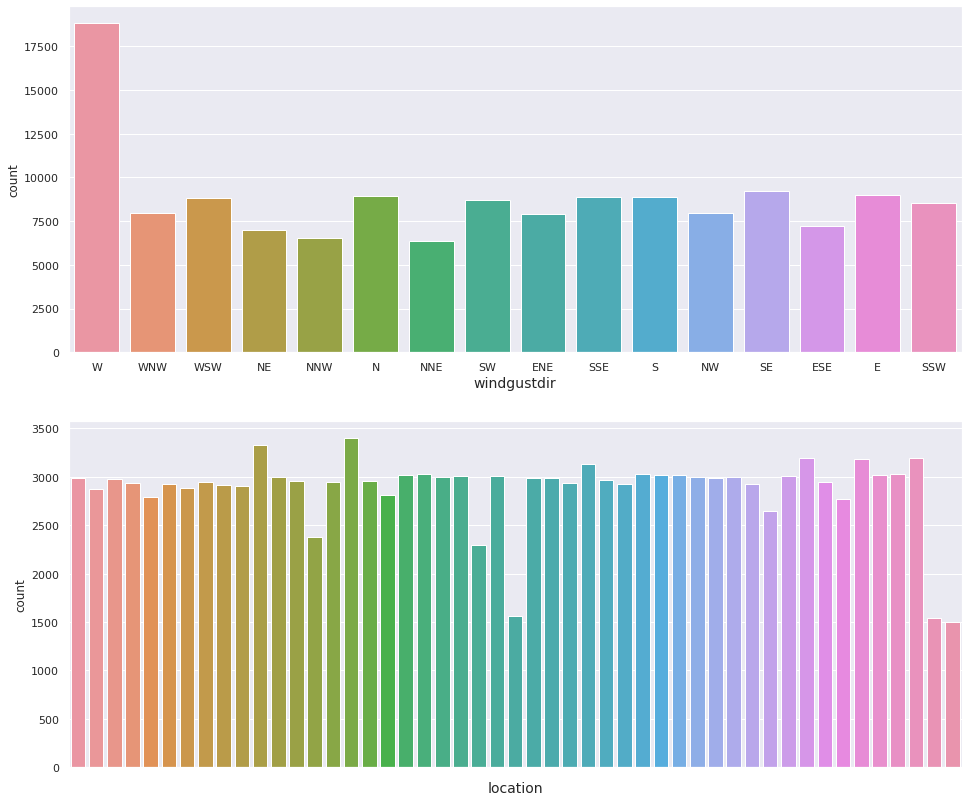

In [713]:
fig, ax = plt.subplots(2, 1, figsize=(16, 14))
sns.countplot(data=data, x='windgustdir', ax=ax[0])
sns.countplot(data=data, x='location', ax=ax[1])

ax[0].set_xlabel('windgustdir', fontsize=14)
ax[1].set_xlabel('location', fontsize=14)

ax[1].set_xticklabels('')

plt.show()

In [736]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

labels = ['Yes', 'No']

fig.add_trace(go.Pie(labels=labels, values=[31454, 109330], name="raintoday"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[31201, 109583], name="raintomorrow"), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(annotations=[dict(text='raintoday', x=0.18, y=0.5, font_size=20, showarrow=False),
                               dict(text='raintomorrow', x=0.85, y=0.5, font_size=20, showarrow=False)], 
                               template='ggplot2')

fig.show()

<a id="id3"></a>
## 3. Exploratory data analysis

In [737]:
data_for_corr = data.copy()
data_for_corr['raintomorrow'] = data_for_corr['raintomorrow'].map({'Yes': 1, 'No': 0})
data_for_corr['raintoday'] = data_for_corr['raintoday'].map({'Yes': 1, 'No': 0})

corrs = data_for_corr.corr()
ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=np.around(corrs.values, decimals=2),
    showscale=True)